In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("ratings.csv")

#### Let's take a look at the data!

In [2]:
data[:10]

,TEXT,RATING
0,The shirt was more of a smock. I expected a so...,1
1,The shirt was more of a smock. I expected a so...,1
2,The shirt was more of a smock. I expected a so...,1
3,Just received my order today. When I opened th...,1
4,"First of all, the button hole on this belt nev...",1
5,these didnt hold anything up and was obvious i...,1
6,Nothing else needed to say,1
7,This didn't work on most of my pants because t...,1
8,I was really excited to get this product but w...,1
9,I was really excited to get this product but w...,1


### Class balance?

In [3]:
data["RATING"].unique()

array([1, 2, 3, 5, 4])

In [4]:
for i in data["RATING"].unique():
    number_per_class = len(data[data["RATING"] == i])
    print('RATING: ',i,'NUMBER DATA: ',number_per_class) #2OOO FROM EACH CLASS: BALANCED.

RATING:  1 NUMBER DATA:  2000
RATING:  2 NUMBER DATA:  2000
RATING:  3 NUMBER DATA:  2000
RATING:  5 NUMBER DATA:  2000
RATING:  4 NUMBER DATA:  2000


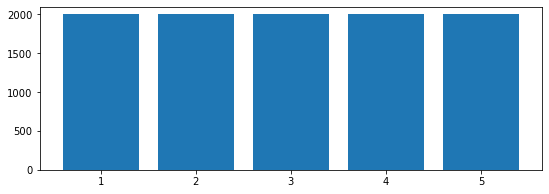

In [5]:
plt.figure(figsize=(9, 3))
plt.bar(data["RATING"].unique(), number_per_class)
plt.show()
#It was explicitely said to plot it

###  Five most predominant words for each class.

In [ ]:
#First, I preprocess the data so that the most frequent words are not: the, I, etc, but valuable words,
#which can give us insights of the main meaning of the text.

In [105]:
#Proof that actually that happens
from collections import Counter
for i in range(1,6):
    print('With rating : ',i,' words: ',Counter(" ".join(data[data["RATING"] == i]["TEXT"]).split()).most_common(5))

With rating :  1  words:  [('the', 3692), ('I', 3689), ('and', 2253), ('a', 1845), ('to', 1619)]
With rating :  2  words:  [('the', 4486), ('I', 4224), ('and', 2510), ('a', 1996), ('to', 1897)]
With rating :  3  words:  [('I', 4347), ('the', 4297), ('a', 2551), ('and', 2427), ('to', 2039)]
With rating :  4  words:  [('I', 4343), ('the', 3902), ('a', 2833), ('and', 2751), ('to', 2015)]
With rating :  5  words:  [('I', 4684), ('and', 3310), ('the', 3034), ('a', 2455), ('to', 2319)]


In [99]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import stopwords
from pycontractions import Contractions

#This is the best preprocessing that I found.
#I have also tried: Expanding (wouldn't --> would not)
#                   Taking into account 'not' because it could have been helpful for negative reviews
#                                        but I have found that it would appear a lot (top 1) in all reviews.

def preprocess(x):
    #lower cases and possible noise
    x =  re.sub('[^a-z\s]', '', x.lower()) 
    
    #Lemmatize
    lemmatizer = WordNetLemmatizer() 
    lemm = lemmatizer.lemmatize(x)
    
    #tokenizer
    word_tokens = nltk.word_tokenize(lemm)

    #stopwords
    stopword = stopwords.words('english')
    removing_stopwords = [word for word in word_tokens if word not in stopword]

    #words non alphabetic. Remove punctuation
    words_alp = [word for word in removing_stopwords if word.isalpha()]
    
    return words_alp    

data['Clean_text'] = data['TEXT'].apply(preprocess)


In [104]:
from collections import defaultdict 
import operator

for rating in range(1,6):
    
    d = defaultdict(int) 
    for i in data[data["RATING"] == rating]["Clean_text"]: #loop over all new texts
        for j in i:                                        #loos over words in each new text
            d[j] += 1                                   #with defaultdict if there is no word it creates an new key

    print('With rating : ',rating,' words:',dict(sorted(d.items(), key=operator.itemgetter(1), reverse=True)[:5]))

With rating :  1  words: {'bra': 1311, 'size': 610, 'like': 465, 'fit': 455, 'bras': 357}
With rating :  2  words: {'bra': 1271, 'size': 628, 'like': 578, 'fit': 524, 'would': 435}
With rating :  3  words: {'bra': 1613, 'size': 660, 'like': 609, 'would': 534, 'comfortable': 512}
With rating :  4  words: {'bra': 984, 'size': 620, 'like': 539, 'fit': 479, 'comfortable': 456}
With rating :  5  words: {'love': 648, 'great': 618, 'bra': 533, 'size': 485, 'pumping': 460}
